In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
SMALL_SIZE = 8
MEDIUM_SIZE = 16
BIGGER_SIZE = 24

In [2]:
test_data = pd.read_csv(os.path.join('../data', 'cleanLoanDataValidationAllIncome.csv'))
test_data['LogTotalIncome']=np.log(test_data['TotalIncome'])
pd.set_option('display.max_columns', None)
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LogTotalIncome
0,0,1,0,1,0,5720.0,0.0,110000.0,360.0,1,2,5720.0,8.651724
1,0,1,1,1,0,3076.0,1500.0,126000.0,360.0,1,2,4576.0,8.428581
2,0,1,2,1,0,5000.0,1800.0,208000.0,360.0,1,2,6800.0,8.824678
3,0,1,2,1,0,2340.0,2546.0,100000.0,360.0,0,2,4886.0,8.494129
4,0,0,0,0,0,3276.0,0.0,78000.0,360.0,1,2,3276.0,8.094378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,0,1,3,0,1,4009.0,1777.0,113000.0,360.0,1,2,5786.0,8.663196
341,0,1,0,1,0,4158.0,709.0,115000.0,360.0,1,2,4867.0,8.490233
342,0,0,0,1,0,3250.0,1993.0,126000.0,360.0,0,1,5243.0,8.564649
343,0,1,0,1,0,5000.0,2393.0,158000.0,360.0,1,0,7393.0,8.908289


In [3]:
train_data = pd.read_csv(os.path.join('../data', 'cleanLoanDataTrainAllIncome.csv'))
train_data['LogTotalIncome']=np.log(train_data['TotalIncome'])
pd.set_option('display.max_columns', None)
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LogTotalIncome
0,0,1,1,1,0,4583.0,1508.0,128000.0,360.0,1,0,0,6091.0,8.714568
1,0,1,0,1,1,3000.0,0.0,66000.0,360.0,1,2,1,3000.0,8.006368
2,0,1,0,0,0,2583.0,2358.0,120000.0,360.0,1,2,1,4941.0,8.505323
3,0,0,0,1,0,6000.0,0.0,141000.0,360.0,1,2,1,6000.0,8.699515
4,0,1,2,1,1,5417.0,4196.0,267000.0,360.0,1,2,1,9613.0,9.170872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,1,0,0,1,0,2900.0,0.0,71000.0,360.0,1,0,1,2900.0,7.972466
559,0,1,3,1,0,4106.0,0.0,40000.0,180.0,1,0,1,4106.0,8.320205
560,0,1,1,1,0,8072.0,240.0,253000.0,360.0,1,2,1,8312.0,9.025456
561,0,1,2,1,0,7583.0,0.0,187000.0,360.0,1,2,1,7583.0,8.933664


## 1a. KNN (Combined income)

In [4]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [5]:
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[-0.48737732,  0.73877435, -0.76620308, ...,  0.55727821,
         1.23961503, -0.40857726],
       [-0.48737732,  0.73877435,  1.21139753, ...,  0.55727821,
        -1.29979052,  1.64839807],
       [ 2.05179837,  0.73877435, -0.76620308, ...,  0.55727821,
        -0.03008774, -0.31752894],
       ...,
       [-0.48737732,  0.73877435, -0.76620308, ...,  0.55727821,
        -0.03008774, -0.66804054],
       [ 2.05179837, -1.35359328, -0.76620308, ...,  0.55727821,
        -1.29979052,  0.02027823],
       [-0.48737732, -1.35359328, -0.76620308, ...,  0.55727821,
         1.23961503, -0.75583131]])

k: 1, Train/Test Score: 1.000/0.674
k: 3, Train/Test Score: 0.820/0.738
k: 5, Train/Test Score: 0.775/0.752
k: 7, Train/Test Score: 0.775/0.723
k: 9, Train/Test Score: 0.763/0.738
k: 11, Train/Test Score: 0.773/0.745
k: 13, Train/Test Score: 0.775/0.738
k: 15, Train/Test Score: 0.777/0.738
k: 17, Train/Test Score: 0.770/0.738
k: 19, Train/Test Score: 0.765/0.745
k: 21, Train/Test Score: 0.754/0.745
k: 23, Train/Test Score: 0.749/0.745
k: 25, Train/Test Score: 0.751/0.745
k: 27, Train/Test Score: 0.754/0.738
k: 29, Train/Test Score: 0.751/0.738
k: 31, Train/Test Score: 0.756/0.738
k: 33, Train/Test Score: 0.751/0.730
k: 35, Train/Test Score: 0.744/0.738
k: 37, Train/Test Score: 0.742/0.723
k: 39, Train/Test Score: 0.735/0.730


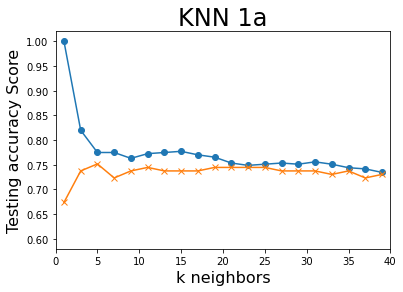

In [9]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 1a", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_1a.png')
plt.show()


In [10]:
# Note that k: 5 seems to be approx. the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.752


## 1b. KNN (Applicant and co-applicant income separate)

In [11]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [13]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [14]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[-0.48737732,  0.73877435, -0.76620308, ...,  0.30723956,
         0.55727821,  1.23961503],
       [-0.48737732,  0.73877435,  1.21139753, ..., -0.57717446,
         0.55727821, -1.29979052],
       [ 2.05179837,  0.73877435, -0.76620308, ...,  0.30723956,
         0.55727821, -0.03008774],
       ...,
       [-0.48737732,  0.73877435, -0.76620308, ...,  0.30723956,
         0.55727821, -0.03008774],
       [ 2.05179837, -1.35359328, -0.76620308, ...,  0.30723956,
         0.55727821, -1.29979052],
       [-0.48737732, -1.35359328, -0.76620308, ...,  0.30723956,
         0.55727821,  1.23961503]])

k: 1, Train/Test Score: 1.000/0.645
k: 3, Train/Test Score: 0.829/0.716
k: 5, Train/Test Score: 0.784/0.766
k: 7, Train/Test Score: 0.775/0.745
k: 9, Train/Test Score: 0.768/0.745
k: 11, Train/Test Score: 0.763/0.730
k: 13, Train/Test Score: 0.770/0.745
k: 15, Train/Test Score: 0.775/0.738
k: 17, Train/Test Score: 0.768/0.738
k: 19, Train/Test Score: 0.744/0.745
k: 21, Train/Test Score: 0.749/0.745
k: 23, Train/Test Score: 0.746/0.738
k: 25, Train/Test Score: 0.744/0.738
k: 27, Train/Test Score: 0.749/0.730
k: 29, Train/Test Score: 0.756/0.738
k: 31, Train/Test Score: 0.739/0.738
k: 33, Train/Test Score: 0.742/0.723
k: 35, Train/Test Score: 0.742/0.723
k: 37, Train/Test Score: 0.742/0.730
k: 39, Train/Test Score: 0.739/0.730


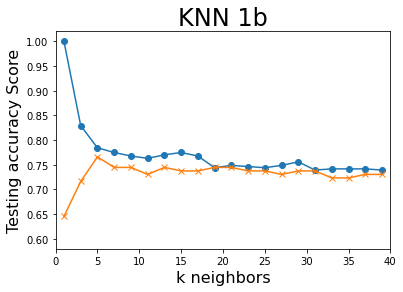

In [15]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 1b", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_1b.png')
plt.show()

In [16]:
# Note that k: 5 seems to be approx. the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.766


## 1c. KNN (log(TotalIncome))¶

In [17]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [19]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [20]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[-0.48737732,  0.73877435, -0.76620308, ...,  0.55727821,
         1.23961503, -0.49690555],
       [-0.48737732,  0.73877435,  1.21139753, ...,  0.55727821,
        -1.29979052,  2.00247029],
       [ 2.05179837,  0.73877435, -0.76620308, ...,  0.55727821,
        -0.03008774, -0.27922849],
       ...,
       [-0.48737732,  0.73877435, -0.76620308, ...,  0.55727821,
        -0.03008774, -1.30554004],
       [ 2.05179837, -1.35359328, -0.76620308, ...,  0.55727821,
        -1.29979052,  0.36126288],
       [-0.48737732, -1.35359328, -0.76620308, ...,  0.55727821,
         1.23961503, -1.68249756]])

k: 1, Train/Test Score: 1.000/0.667
k: 3, Train/Test Score: 0.825/0.738
k: 5, Train/Test Score: 0.777/0.766
k: 7, Train/Test Score: 0.780/0.759
k: 9, Train/Test Score: 0.775/0.752
k: 11, Train/Test Score: 0.775/0.759
k: 13, Train/Test Score: 0.773/0.745
k: 15, Train/Test Score: 0.777/0.745
k: 17, Train/Test Score: 0.768/0.745
k: 19, Train/Test Score: 0.768/0.730
k: 21, Train/Test Score: 0.754/0.738
k: 23, Train/Test Score: 0.746/0.745
k: 25, Train/Test Score: 0.749/0.752
k: 27, Train/Test Score: 0.746/0.745
k: 29, Train/Test Score: 0.742/0.738
k: 31, Train/Test Score: 0.749/0.723
k: 33, Train/Test Score: 0.742/0.716
k: 35, Train/Test Score: 0.735/0.716
k: 37, Train/Test Score: 0.739/0.716
k: 39, Train/Test Score: 0.735/0.716


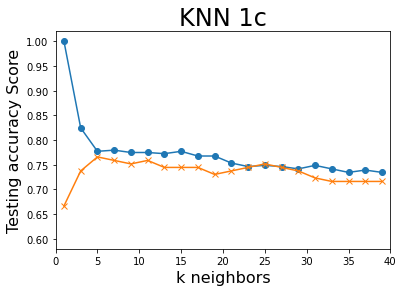

In [21]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 1c", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_1c.png')
plt.show()

In [22]:
# Note that k: 5 seems to be approx. the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.766


## 2a. KNN, took out Loan_Amount_Term (Combined incomes)

In [23]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.674
k: 3, Train/Test Score: 0.820/0.738
k: 5, Train/Test Score: 0.775/0.752
k: 7, Train/Test Score: 0.775/0.723
k: 9, Train/Test Score: 0.763/0.738
k: 11, Train/Test Score: 0.773/0.745
k: 13, Train/Test Score: 0.775/0.738
k: 15, Train/Test Score: 0.777/0.738
k: 17, Train/Test Score: 0.770/0.738
k: 19, Train/Test Score: 0.765/0.745
k: 21, Train/Test Score: 0.754/0.745
k: 23, Train/Test Score: 0.749/0.745
k: 25, Train/Test Score: 0.751/0.745
k: 27, Train/Test Score: 0.754/0.738
k: 29, Train/Test Score: 0.751/0.738
k: 31, Train/Test Score: 0.756/0.738
k: 33, Train/Test Score: 0.751/0.730
k: 35, Train/Test Score: 0.744/0.738
k: 37, Train/Test Score: 0.742/0.723
k: 39, Train/Test Score: 0.735/0.730


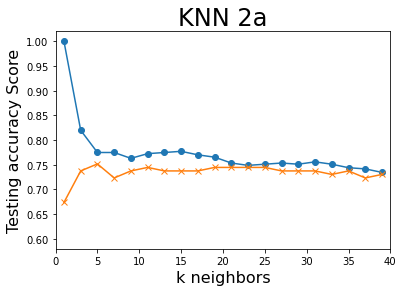

In [25]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 2a", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_2a.png')
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.752


## 2b. KNN, took out Loan_Amount_Term (Applicant and co-applicant incomes separate)

In [27]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", 'Loan_Amount_Term', "LogTotalIncome"], axis=1)
feature_names = data.columns

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.652
k: 3, Train/Test Score: 0.832/0.730
k: 5, Train/Test Score: 0.787/0.752
k: 7, Train/Test Score: 0.777/0.738
k: 9, Train/Test Score: 0.777/0.745
k: 11, Train/Test Score: 0.770/0.759
k: 13, Train/Test Score: 0.758/0.745
k: 15, Train/Test Score: 0.768/0.752
k: 17, Train/Test Score: 0.763/0.752
k: 19, Train/Test Score: 0.749/0.730
k: 21, Train/Test Score: 0.751/0.752
k: 23, Train/Test Score: 0.749/0.752
k: 25, Train/Test Score: 0.758/0.745
k: 27, Train/Test Score: 0.756/0.738
k: 29, Train/Test Score: 0.756/0.730
k: 31, Train/Test Score: 0.746/0.730
k: 33, Train/Test Score: 0.730/0.723
k: 35, Train/Test Score: 0.730/0.716
k: 37, Train/Test Score: 0.735/0.723
k: 39, Train/Test Score: 0.735/0.730


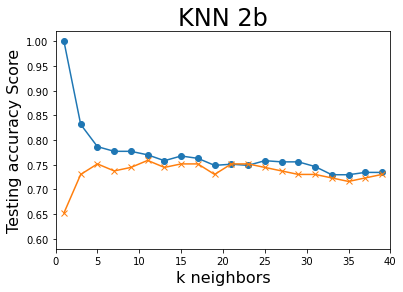

In [29]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 2b", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_2b.png')
plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.759


## 2c. KNN, took out Loan_Amount_Term (log(TotalIncome))

In [35]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", 'Loan_Amount_Term', "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.681
k: 3, Train/Test Score: 0.836/0.730
k: 5, Train/Test Score: 0.784/0.745
k: 7, Train/Test Score: 0.787/0.752
k: 9, Train/Test Score: 0.784/0.752
k: 11, Train/Test Score: 0.782/0.738
k: 13, Train/Test Score: 0.775/0.766
k: 15, Train/Test Score: 0.765/0.759
k: 17, Train/Test Score: 0.758/0.759
k: 19, Train/Test Score: 0.758/0.759
k: 21, Train/Test Score: 0.765/0.752
k: 23, Train/Test Score: 0.761/0.745
k: 25, Train/Test Score: 0.754/0.738
k: 27, Train/Test Score: 0.754/0.723
k: 29, Train/Test Score: 0.744/0.723
k: 31, Train/Test Score: 0.744/0.730
k: 33, Train/Test Score: 0.735/0.730
k: 35, Train/Test Score: 0.727/0.738
k: 37, Train/Test Score: 0.727/0.730
k: 39, Train/Test Score: 0.723/0.723


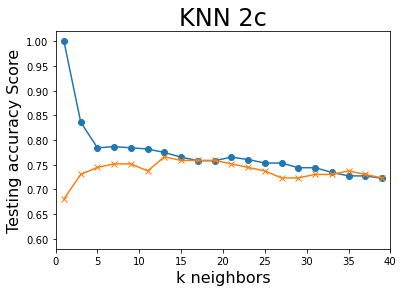

In [37]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 2c", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_2c.png')
plt.show()

In [39]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.766


## 3a. KNN, took out Loan_Amount_Term and LoanAmount (Combined incomes)

In [40]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.638
k: 3, Train/Test Score: 0.822/0.702
k: 5, Train/Test Score: 0.801/0.723
k: 7, Train/Test Score: 0.787/0.738
k: 9, Train/Test Score: 0.780/0.730
k: 11, Train/Test Score: 0.770/0.738
k: 13, Train/Test Score: 0.775/0.738
k: 15, Train/Test Score: 0.768/0.738
k: 17, Train/Test Score: 0.758/0.745
k: 19, Train/Test Score: 0.751/0.745
k: 21, Train/Test Score: 0.749/0.752
k: 23, Train/Test Score: 0.756/0.745
k: 25, Train/Test Score: 0.754/0.752
k: 27, Train/Test Score: 0.758/0.752
k: 29, Train/Test Score: 0.746/0.738
k: 31, Train/Test Score: 0.751/0.723
k: 33, Train/Test Score: 0.739/0.738
k: 35, Train/Test Score: 0.739/0.752
k: 37, Train/Test Score: 0.744/0.759
k: 39, Train/Test Score: 0.735/0.738


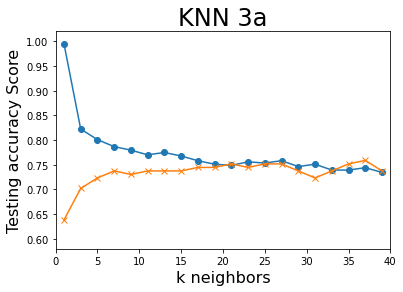

In [42]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 3a", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_3a.png')
plt.show()

In [43]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train_scaled, y_train)
print('k=21 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=21 Test Acc: 0.752


## 3b. KNN, took out Loan_Amount_Term and LoanAmount (Applicant and co-applicant incomes separate)

In [44]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', "TotalIncome", "LogTotalIncome"], axis=1)
feature_names = data.columns

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.688
k: 3, Train/Test Score: 0.836/0.688
k: 5, Train/Test Score: 0.794/0.738
k: 7, Train/Test Score: 0.789/0.745
k: 9, Train/Test Score: 0.775/0.738
k: 11, Train/Test Score: 0.775/0.730
k: 13, Train/Test Score: 0.768/0.745
k: 15, Train/Test Score: 0.768/0.745
k: 17, Train/Test Score: 0.751/0.730
k: 19, Train/Test Score: 0.746/0.723
k: 21, Train/Test Score: 0.746/0.759
k: 23, Train/Test Score: 0.756/0.759
k: 25, Train/Test Score: 0.756/0.752
k: 27, Train/Test Score: 0.763/0.745
k: 29, Train/Test Score: 0.756/0.738
k: 31, Train/Test Score: 0.746/0.730
k: 33, Train/Test Score: 0.746/0.738
k: 35, Train/Test Score: 0.727/0.752
k: 37, Train/Test Score: 0.732/0.752
k: 39, Train/Test Score: 0.735/0.752


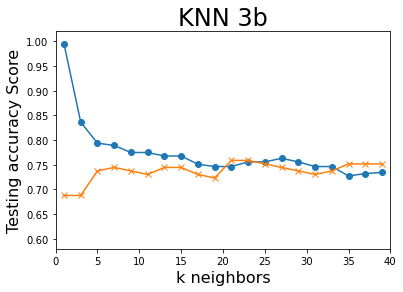

In [46]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 3b", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_3b.png')
plt.show()

In [47]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train_scaled, y_train)
print('k=21 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=21 Test Acc: 0.759


## 3c. KNN, took out Loan_Amount_Term and LoanAmount (log(Total Income))

In [48]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', "TotalIncome", "CoapplicantIncome", "ApplicantIncome"], axis=1)
feature_names = data.columns

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.631
k: 3, Train/Test Score: 0.829/0.702
k: 5, Train/Test Score: 0.801/0.738
k: 7, Train/Test Score: 0.775/0.745
k: 9, Train/Test Score: 0.768/0.745
k: 11, Train/Test Score: 0.768/0.738
k: 13, Train/Test Score: 0.775/0.738
k: 15, Train/Test Score: 0.770/0.738
k: 17, Train/Test Score: 0.754/0.752
k: 19, Train/Test Score: 0.746/0.752
k: 21, Train/Test Score: 0.749/0.738
k: 23, Train/Test Score: 0.758/0.745
k: 25, Train/Test Score: 0.763/0.759
k: 27, Train/Test Score: 0.763/0.738
k: 29, Train/Test Score: 0.739/0.730
k: 31, Train/Test Score: 0.754/0.730
k: 33, Train/Test Score: 0.749/0.730
k: 35, Train/Test Score: 0.737/0.738
k: 37, Train/Test Score: 0.744/0.730
k: 39, Train/Test Score: 0.739/0.723


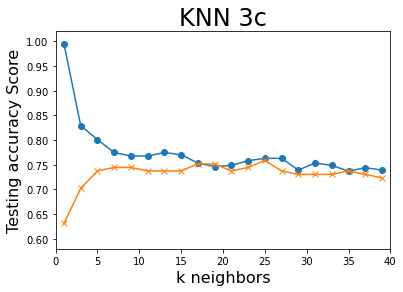

In [50]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 3c", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_3c.png')
plt.show()

In [52]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
print('k=21 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=21 Test Acc: 0.752


## 4a. KNN, took out Loan_Amount_Term and LoanAmount and also factors less important in Random Forest tests (Combined incomes)

In [53]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", 'Self_Employed', 'LoanAmount', 'Education', 'Married', 'Gender', 'Loan_Amount_Term', "LogTotalIncome"], axis=1)
feature_names = data.columns

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.667
k: 3, Train/Test Score: 0.834/0.723
k: 5, Train/Test Score: 0.787/0.738
k: 7, Train/Test Score: 0.777/0.716
k: 9, Train/Test Score: 0.782/0.745
k: 11, Train/Test Score: 0.777/0.738
k: 13, Train/Test Score: 0.775/0.738
k: 15, Train/Test Score: 0.775/0.738
k: 17, Train/Test Score: 0.775/0.745
k: 19, Train/Test Score: 0.775/0.745
k: 21, Train/Test Score: 0.770/0.745
k: 23, Train/Test Score: 0.773/0.745
k: 25, Train/Test Score: 0.775/0.745
k: 27, Train/Test Score: 0.768/0.745
k: 29, Train/Test Score: 0.770/0.745
k: 31, Train/Test Score: 0.773/0.745
k: 33, Train/Test Score: 0.773/0.745
k: 35, Train/Test Score: 0.773/0.745
k: 37, Train/Test Score: 0.773/0.745
k: 39, Train/Test Score: 0.773/0.745


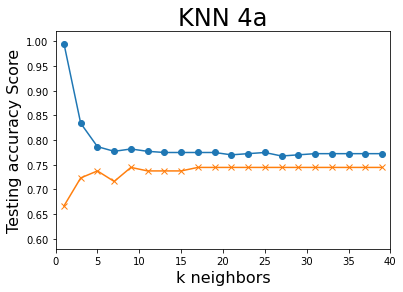

In [55]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 4a", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_4a.png')
plt.show()

In [56]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.745


## 4b. KNN, took out Loan_Amount_Term and LoanAmount and also factors less important in Random Forest tests (Applicant and Co-Applicant incomes considered separately)

In [59]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", 'Self_Employed', 'LoanAmount', 'Education', 'Gender', 'Married', 'Loan_Amount_Term', "LogTotalIncome"],  axis=1)
feature_names = data.columns

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.716
k: 3, Train/Test Score: 0.829/0.709
k: 5, Train/Test Score: 0.801/0.730
k: 7, Train/Test Score: 0.773/0.738
k: 9, Train/Test Score: 0.773/0.738
k: 11, Train/Test Score: 0.775/0.745
k: 13, Train/Test Score: 0.773/0.745
k: 15, Train/Test Score: 0.770/0.745
k: 17, Train/Test Score: 0.773/0.745
k: 19, Train/Test Score: 0.770/0.745
k: 21, Train/Test Score: 0.770/0.745
k: 23, Train/Test Score: 0.770/0.745
k: 25, Train/Test Score: 0.770/0.745
k: 27, Train/Test Score: 0.770/0.745
k: 29, Train/Test Score: 0.770/0.745
k: 31, Train/Test Score: 0.770/0.745
k: 33, Train/Test Score: 0.770/0.745
k: 35, Train/Test Score: 0.768/0.745
k: 37, Train/Test Score: 0.770/0.745
k: 39, Train/Test Score: 0.770/0.745


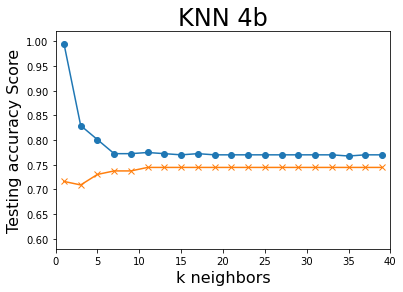

In [61]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 4b", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_4b.png')
plt.show()

In [62]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.745


## 4c KNN, took out Loan_Amount_Term and LoanAmount and also factors less important in Random Forest tests (log(TotalIncome))¶

In [63]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", 'Self_Employed', 'LoanAmount', 'Education', 'Gender', 'Married', 'Loan_Amount_Term', "ApplicantIncome", "CoapplicantIncome"],  axis=1)
feature_names = data.columns

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.652
k: 3, Train/Test Score: 0.839/0.730
k: 5, Train/Test Score: 0.794/0.738
k: 7, Train/Test Score: 0.777/0.730
k: 9, Train/Test Score: 0.782/0.745
k: 11, Train/Test Score: 0.770/0.745
k: 13, Train/Test Score: 0.770/0.745
k: 15, Train/Test Score: 0.775/0.738
k: 17, Train/Test Score: 0.775/0.738
k: 19, Train/Test Score: 0.775/0.745
k: 21, Train/Test Score: 0.770/0.745
k: 23, Train/Test Score: 0.770/0.745
k: 25, Train/Test Score: 0.770/0.745
k: 27, Train/Test Score: 0.770/0.745
k: 29, Train/Test Score: 0.770/0.745
k: 31, Train/Test Score: 0.770/0.745
k: 33, Train/Test Score: 0.770/0.745
k: 35, Train/Test Score: 0.770/0.745
k: 37, Train/Test Score: 0.770/0.745
k: 39, Train/Test Score: 0.773/0.745


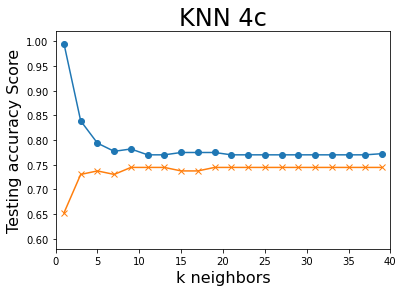

In [65]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 4c", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_4c.png')
plt.show()

In [67]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.745
